In [35]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt 
import pickle
from log import Log

    

In [45]:
class Training:
    def __init__(self):
        self.datasetPath = 'D:\\Datasets\\archive'
        self.imgShape = (64,64)
        self.log = Log()
        
    def getData(self,subset='training'):
        try:
            trainingData = tf.keras.utils.image_dataset_from_directory(
                self.datasetPath,
                validation_split=0.2,
                subset=subset,
                image_size= self.imgShape,
                seed = 58,
                batch_size = 32
            )
            msg = f"{subset.title()} dataset prepared successfully."
            self.log.logger(msg)
            return trainingData
        except Exception as e:
            self.log.logger(str(e))
    
    def visualizeData(self):
        try:
            msg = "Data visualization starts.."
            self.log.logger(msg)
            trainingData = self.getData()
            classNames = trainingData.class_names
            for images,lables in trainingData.take(1):
                plt.figure(figsize=(12,30))
                for i in range(18):
                    plt.subplot(6,3,i+1)
                    plt.imshow(images[i].numpy().astype('uint32'))
                    plt.title(classNames[lables[i].numpy().astype('uint8')])
        except Exception as e:
            self.log.logger(str(e))
                  
    def createModel(self):
        try:
            trainingData = self.getData();
            valData = self.getData(subset='validation')
            msg = "Model training start."
            self.log.logger(msg)
            LAYERS = [
                tf.keras.layers.Rescaling(1./255),
                tf.keras.layers.Conv2D(32,3,activation='relu'),
                tf.keras.layers.MaxPooling2D(),
                tf.keras.layers.Conv2D(32,3,activation='relu'),
                tf.keras.layers.MaxPooling2D(),
                tf.keras.layers.Conv2D(32,3,activation='relu'),
                tf.keras.layers.MaxPooling2D(),
                tf.keras.layers.Flatten(),
                tf.keras.layers.Dense(256,activation='relu'),
                tf.keras.layers.Dense(128,activation='relu'),
                tf.keras.layers.Dense(CLASSES)
            ]
            
            model = tf.keras.models.Sequential(LAYERS)
            model.compile(
                optimizer='adam',
                matrix=['accuracy'],
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logist=True)
            )
            
            hist=model.fit(
                trainingData,
                epochs=100,
                validation_data=valData
            )
            model.save("fruitLife.h5")
            self.log.logger("Model trained successfully.")
        except Exception as e:
            self.log.logger(str(e))
            
    def modelValidation(self):
        try:
            valData = self.getData(subset="validation")
            classNames = valData.class_names
            plt.figure(figsize=(15,35))
            model = tf.keras.models.load_model('fruitLife.h5')
            for images,lables in valData.take(1):
                for i in range(18):
                    plt.subplot(6,3,i+1)
                    img = np.reshape(images[i],(1,64,64,3))
                    probablity = model.predict(img)
                    yPred = classNames[np.argmax(probablity)]
                    yActual = classNames[lables[i].numpy().astype('uint32')]
                    plt.imshow(images[i].numpy().astype('uint8'))
                    plt.title(f"Model Evaluation")
                    plt.xlabel(f"Actual:{yActual}")
                    plt.ylabel(f"Predicted:{yPred}")
            self.log.logger("Model validated")
        except Exception as e:
            self.log.logger(str(e))

In [46]:
obj = Training()

## Data Visualization

Found 1932 files belonging to 14 classes.
Using 1546 files for training.


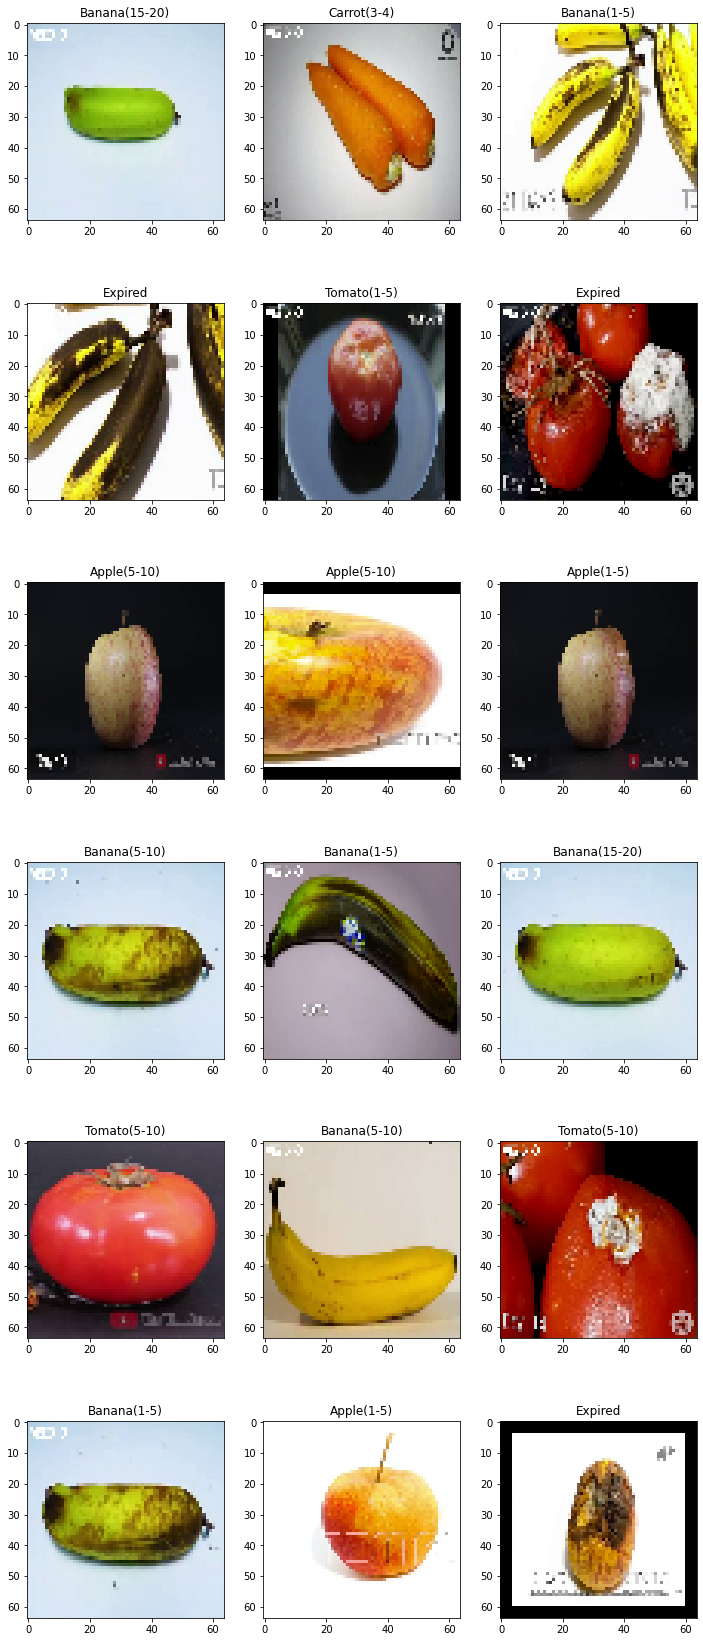

In [47]:
obj.visualizeData()

## For training 

In [42]:
#obj.createModel()

## For Validation

Found 1932 files belonging to 14 classes.
Using 386 files for validation.


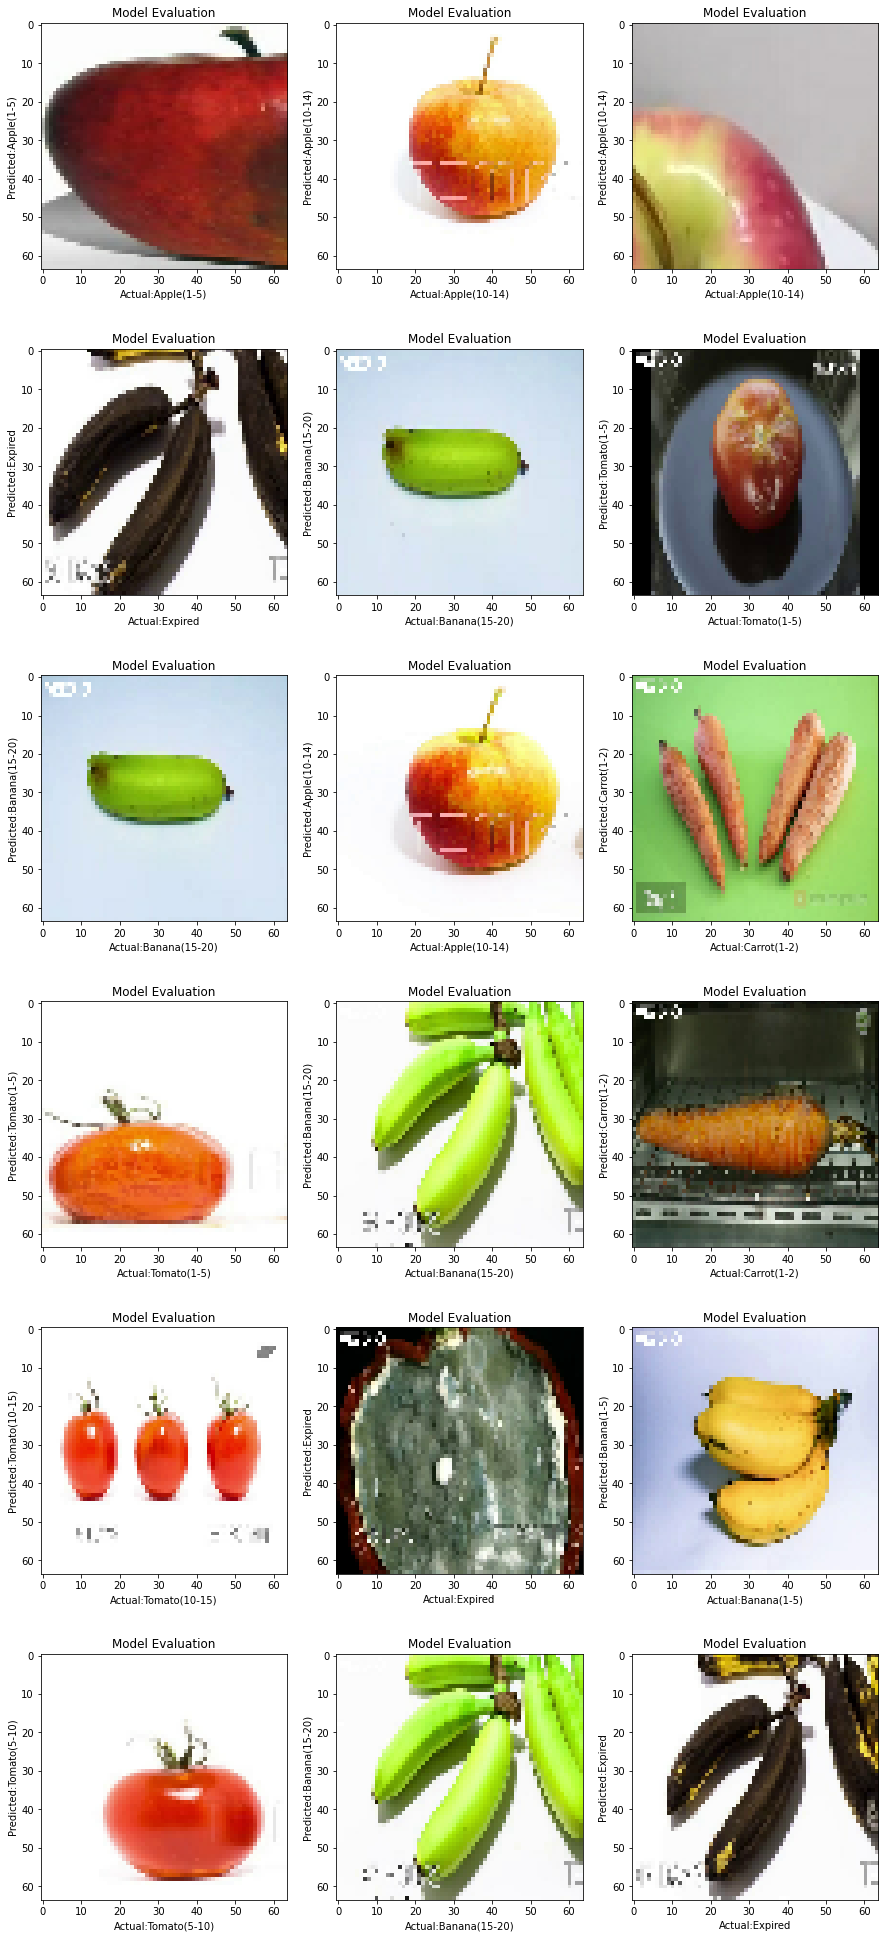

In [43]:
obj.modelValidation()